In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('clean_data.csv')

X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
df = df[['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude', 'YearSold', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'AgeAtSale',
       'Type_h', 'Type_t', 'Type_u', 'Council_Banyule', 'Council_Bayside',
       'Council_Boroondara', 'Council_Brimbank', 'Council_Cardinia',
       'Council_Casey', 'Council_Darebin', 'Council_Frankston',
       'Council_Glen Eira', 'Council_Greater Dandenong', 'Council_Hobsons Bay',
       'Council_Hume', 'Council_Kingston', 'Council_Knox',
       'Council_Macedon Ranges', 'Council_Manningham', 'Council_Maribyrnong',
       'Council_Maroondah', 'Council_Melbourne', 'Council_Melton',
       'Council_MissingCouncil', 'Council_Monash', 'Council_Moonee Valley',
       'Council_Moorabool', 'Council_Moreland', 'Council_Nillumbik',
       'Council_Port Phillip', 'Council_Stonnington', 'Council_Unavailable',
       'Council_Whitehorse', 'Council_Whittlesea', 'Council_Wyndham',
       'Council_Yarra', 'Council_Yarra Ranges', 'Region_Eastern Metropolitan',
       'Region_Eastern Victoria', 'Region_Northern Metropolitan',
       'Region_Northern Victoria', 'Region_South-Eastern Metropolitan',
       'Region_Southern Metropolitan', 'Region_Western Metropolitan',
       'Region_Western Victoria']]

In [36]:
df.columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude', 'YearSold', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'AgeAtSale',
       'Type_h', 'Type_t', 'Type_u', 'Council_Banyule', 'Council_Bayside',
       'Council_Boroondara', 'Council_Brimbank', 'Council_Cardinia',
       'Council_Casey', 'Council_Darebin', 'Council_Frankston',
       'Council_Glen Eira', 'Council_Greater Dandenong', 'Council_Hobsons Bay',
       'Council_Hume', 'Council_Kingston', 'Council_Knox',
       'Council_Macedon Ranges', 'Council_Manningham', 'Council_Maribyrnong',
       'Council_Maroondah', 'Council_Melbourne', 'Council_Melton',
       'Council_MissingCouncil', 'Council_Monash', 'Council_Moonee Valley',
       'Council_Moorabool', 'Council_Moreland', 'Council_Nillumbik',
       'Council_Port Phillip', 'Council_Stonnington', 'Council_Unavailable',
       'Council_Whitehorse', 'Council_Whittlesea', 'Council_Wyndham',


In [11]:
df.head(1)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,YearSold,Season_Fall,Season_Spring,Season_Summer,Season_Winter,AgeAtSale,Type_h,Type_t,Type_u
0,0.111111,1480000.0,0.052743,0.0,0.1,0.0505,0.021702,0.489698,0.517651,0.0,0,0,0,1,0.255319,1,0,0


In [100]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

MSE: 150162067759.2792
RMSE: 387507.50671345607
MAE: 265434.9199101796
R-squared: 0.619805406750868


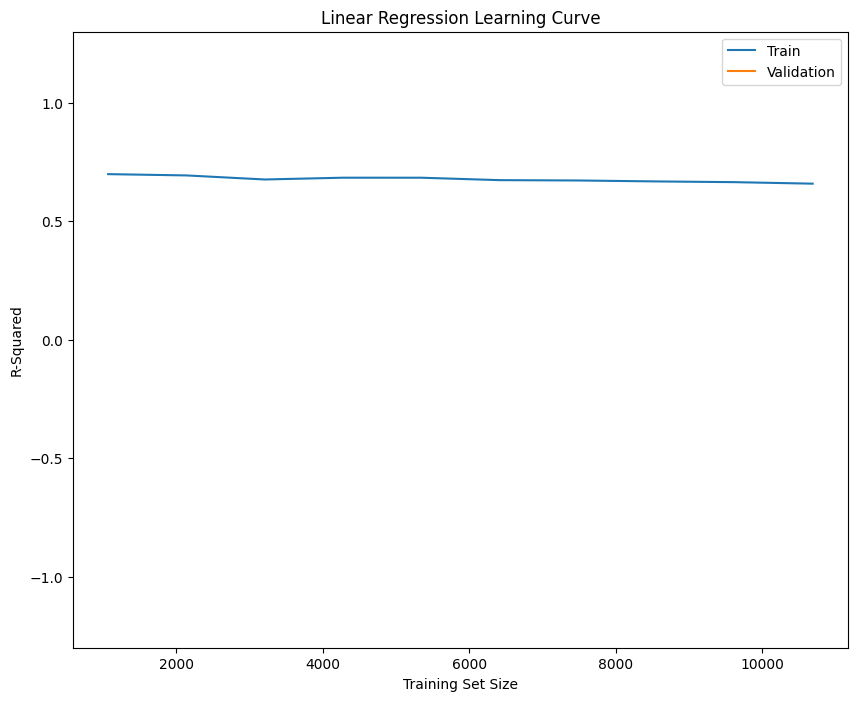

In [102]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr_model,
    X=X,
    y=y,
    cv=5,
    scoring="r2",
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")

plt.title("Linear Regression Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-Squared")
plt.legend(loc="best")
plt.ylim(-1.3, 1.3)

plt.show()

In [118]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('clean_data.csv')

X = df.drop('Price', axis=1)
y = df['Price']

pca = PCA()
X_pca_pre = pca.fit_transform(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Step 2: Re-fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca.fit(X)

# Step 3: Transform your data with the PCA model
X = pca.transform(X)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

MSE: 162093184276.95346
RMSE: 402607.9784069777
MAE: 276960.3848319989
R-squared: 0.5895970721219328


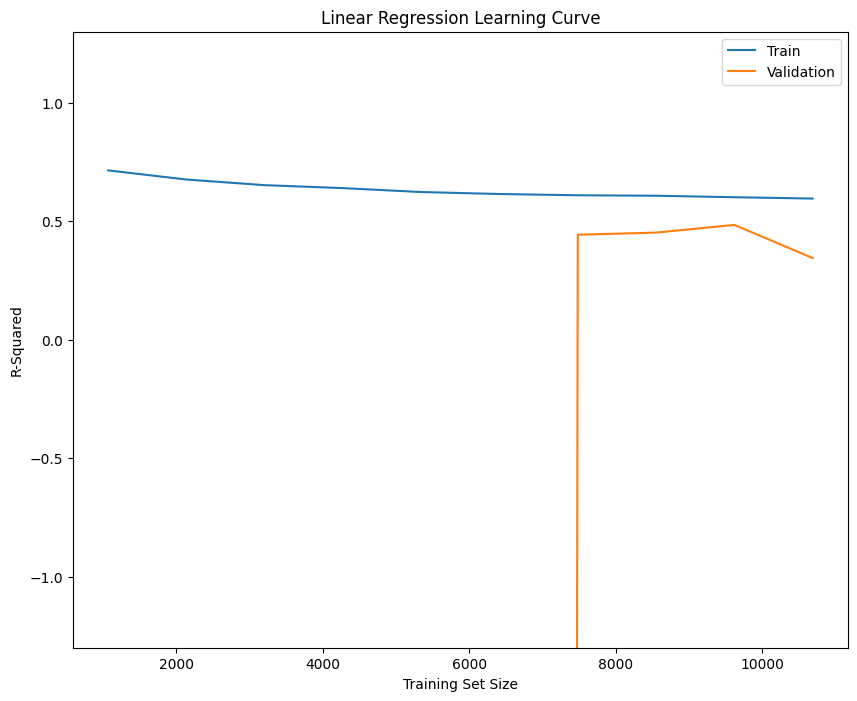

In [119]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr_model,
    X=X,
    y=y,
    cv=5,
    scoring="r2",
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")

plt.title("Linear Regression Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-Squared")
plt.legend(loc="best")
plt.ylim(-1.3, 1.3)

plt.show()

In [124]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('clean_data.csv')

X = df.drop('Price', axis=1)
# Apply log transformation
df['Log_Price'] = np.log1p(df['Price'])

# Now use 'Log_Price' as your target variable in model training
y = df['Log_Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

MSE: 0.06716212303347759
RMSE: 0.259156560853623
MAE: 0.19932369761303984
R-squared: 0.7555073426380717


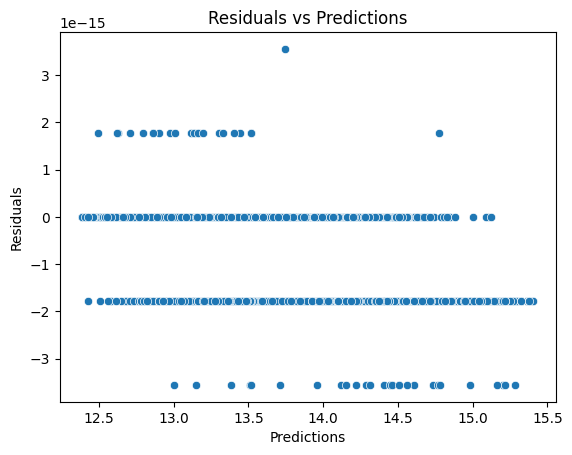

In [125]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(df.drop('Price', axis=1), df['Log_Price'])
predictions = model.predict(df.drop('Price', axis=1))
residuals = df['Log_Price'] - predictions

sns.scatterplot(x=predictions, y=residuals)
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()


In [129]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('clean_data.csv')

X = df.drop('Price', axis=1)
# Apply log transformation
df['Log_Price'] = np.log1p(df['Price'])

# Now use 'Log_Price' as your target variable in model training
y = df['Log_Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

MSE: 0.06716212303347759
RMSE: 0.259156560853623
MAE: 0.19932369761303984
R-squared: 0.7555073426380717


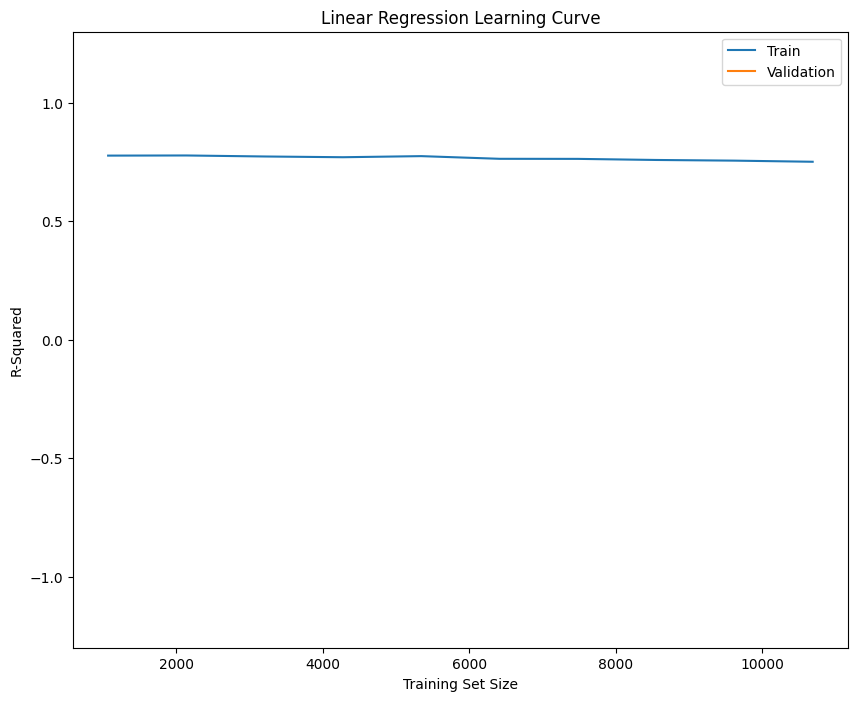

In [130]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr_model,
    X=X,
    y=y,
    cv=5,
    scoring="r2",
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")

plt.title("Linear Regression Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-Squared")
plt.legend(loc="best")
plt.ylim(-1.3, 1.3)

plt.show()

In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv('clean_data.csv')

X = df.drop('Price', axis=1)
# Assuming 'features_to_log_transform' is a list of column names for which a log transformation is appropriate
features_to_log_transform = ['Landsize', 'BuildingArea']

# Apply log transformation to selected features
for feature in features_to_log_transform:
    X[feature] = np.log1p(X[feature])
# Apply log transformation
df['Log_Price'] = np.log1p(df['Price'])

# Now use 'Log_Price' as your target variable in model training
y = df['Log_Price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Performance
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

MSE: 0.06679930416886798
RMSE: 0.25845561353715646
MAE: 0.19880566314969023
R-squared: 0.7568281250127626


In [133]:
df.columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude', 'YearSold', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'AgeAtSale',
       'Type_h', 'Type_t', 'Type_u', 'Council_Banyule', 'Council_Bayside',
       'Council_Boroondara', 'Council_Brimbank', 'Council_Cardinia',
       'Council_Casey', 'Council_Darebin', 'Council_Frankston',
       'Council_Glen Eira', 'Council_Greater Dandenong', 'Council_Hobsons Bay',
       'Council_Hume', 'Council_Kingston', 'Council_Knox',
       'Council_Macedon Ranges', 'Council_Manningham', 'Council_Maribyrnong',
       'Council_Maroondah', 'Council_Melbourne', 'Council_Melton',
       'Council_MissingCouncil', 'Council_Monash', 'Council_Moonee Valley',
       'Council_Moorabool', 'Council_Moreland', 'Council_Nillumbik',
       'Council_Port Phillip', 'Council_Stonnington', 'Council_Unavailable',
       'Council_Whitehorse', 'Council_Whittlesea', 'Council_Wyndham',
